In [1]:
import pandas as pd
import numpy as np
import os
import sys
import random
from itertools import product
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


sys.path.extend([
    '../src',
    '../data',
    '../utils',
    '../plot'

])

from utils import run_nested_cv, create_sliding_windows, time_rf_inference_for_subject
from utils import run_nested_cv, run_approach, process_fold
from utils import run_nested_cv, run_approach, process_fold

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("CPU")
    
seed_num = 42
random.seed(seed_num)
np.random.seed(seed_num)
tf.random.set_seed(seed_num)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

#data
left = pd.read_csv('../data/left.csv')
right = pd.read_csv('../data/right.csv')
affected = pd.read_csv('../data/affected.csv')
unaffected = pd.read_csv('../data/unaffected.csv')

right['limb'] = 1
left['limb'] = 2
affected['limb'] = 3
unaffected['limb'] = 4

affected['subject'] = affected['subject'] + 10
unaffected['subject'] = unaffected['subject'] + 10

combined = pd.concat([unaffected, 
                      affected, 
                      right, 
                      left], ignore_index=True)

architecture = {
               'num_filters': [50, 25],
               'filter_sizes': [5, 5],
               'pool_sizes': [5, 5]
               }

CPU


2025-07-04 08:47:58.580279: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.411
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.518


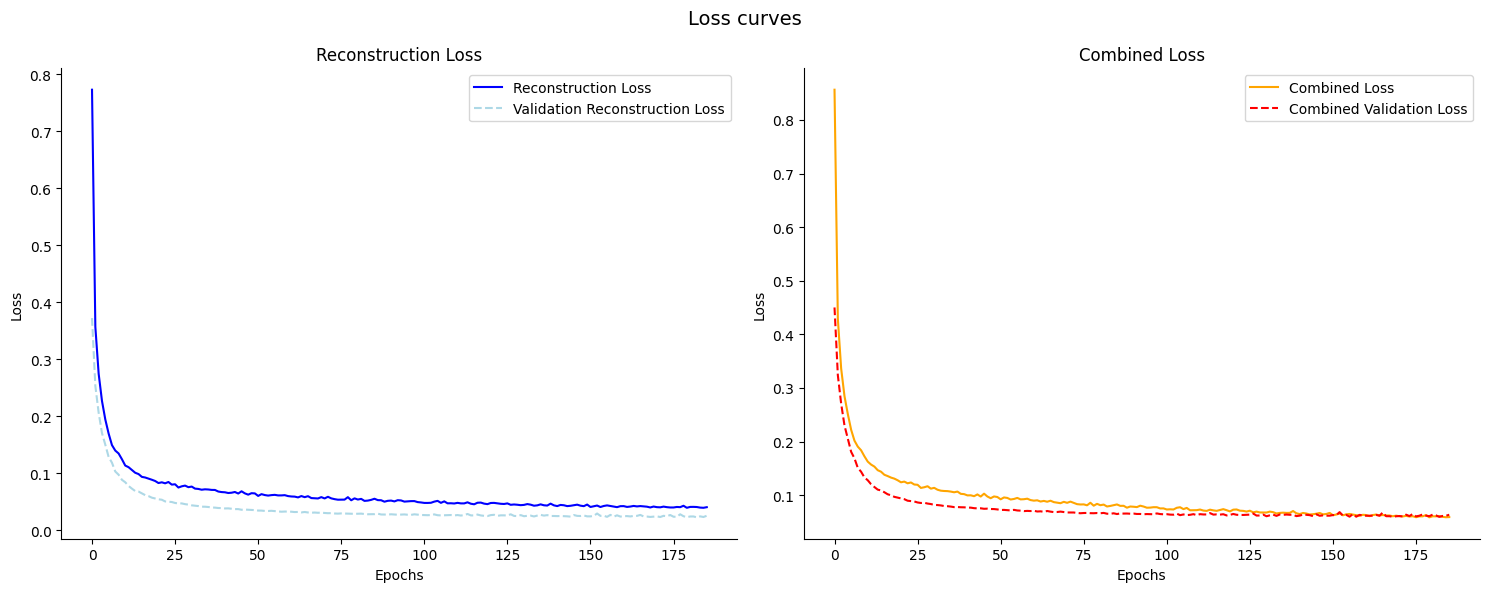

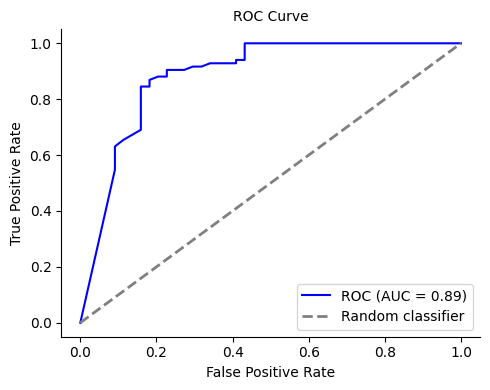

Limb: 4 Subject: 11 Youden Index: 0.5313852813852815 Sensitivity: 0.9404761904761905 Specificity: 0.5909090909090909
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.394
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.428


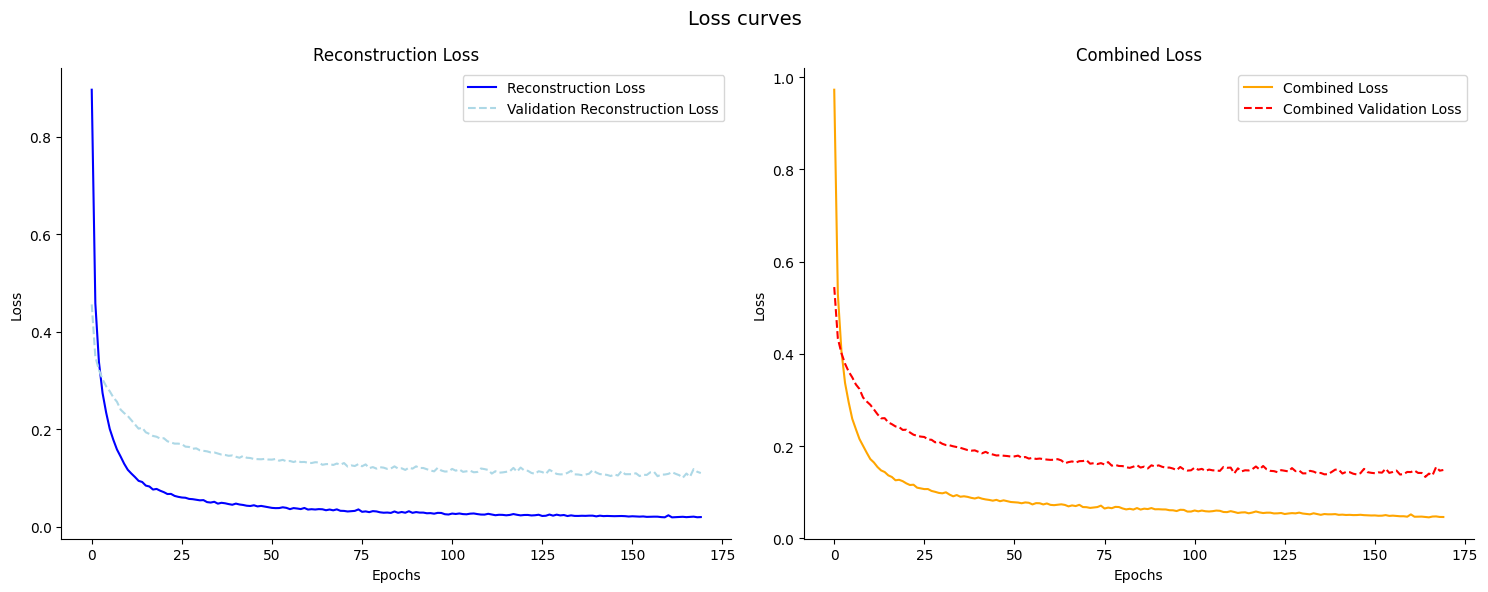

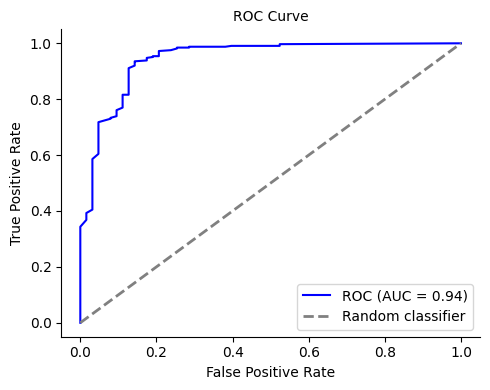

Limb: 4 Subject: 12 Youden Index: 0.6925698704839809 Sensitivity: 0.803680981595092 Specificity: 0.8888888888888888
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.571
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.612


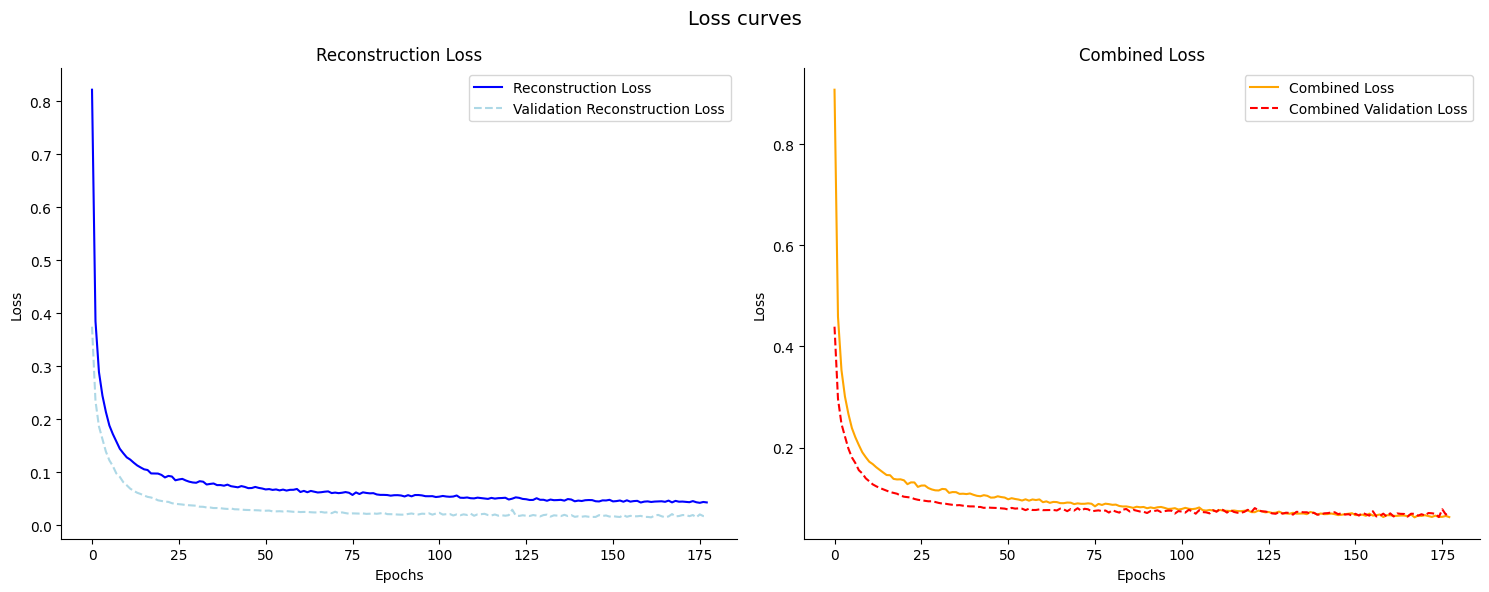

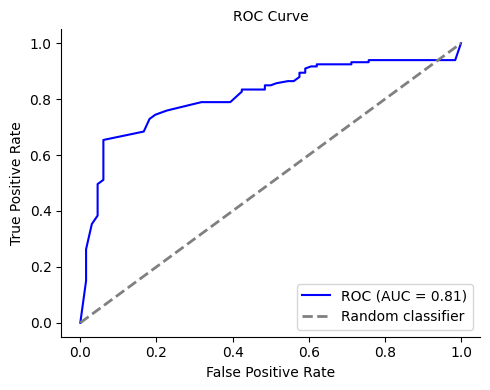

Limb: 4 Subject: 13 Youden Index: 0.31886534518113474 Sensitivity: 0.9097744360902256 Specificity: 0.4090909090909091
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.324
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.340


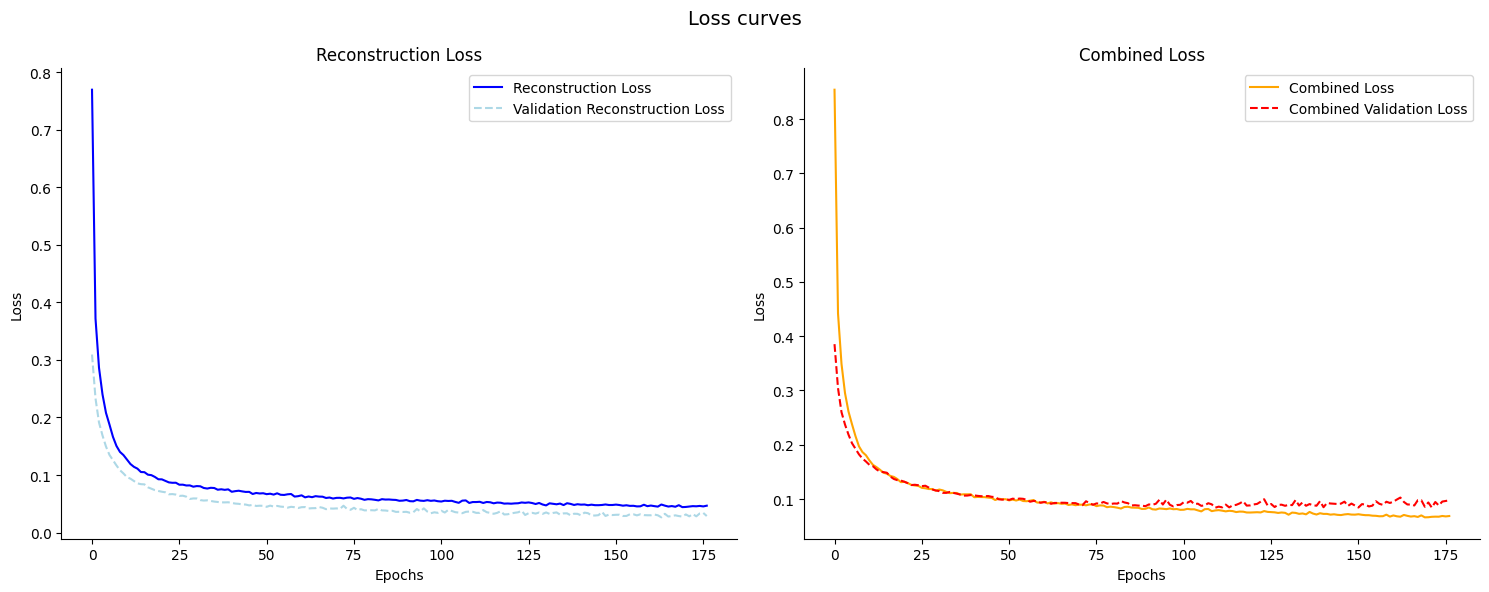

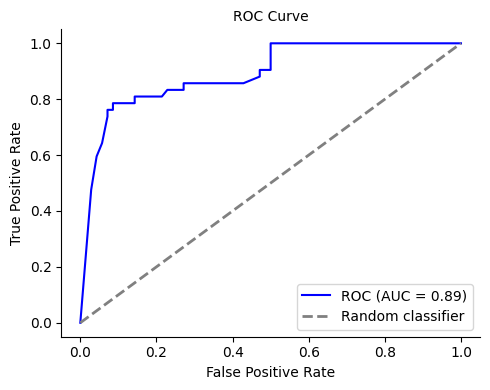

Limb: 4 Subject: 14 Youden Index: 0.45238095238095233 Sensitivity: 0.9523809523809523 Specificity: 0.5
New best HP found: {'activation': 'relu', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.335
New best HP found: {'activation': 'relu', 'batch_norm': False, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object at 0x103ee0700>, 'learning_rate': 0.0001, 'loss': <function mean_squared_error at 0x16a9bf5e0>, 'optimizer': 'nadam'} with score: 0.360
New best HP found: {'activation': 'tanh', 'batch_norm': True, 'bias_init': <keras.initializers.initializers_v2.Zeros object at 0x30b374160>, 'kernel_init': <keras.initializers.initializers_v2.HeNormal object 

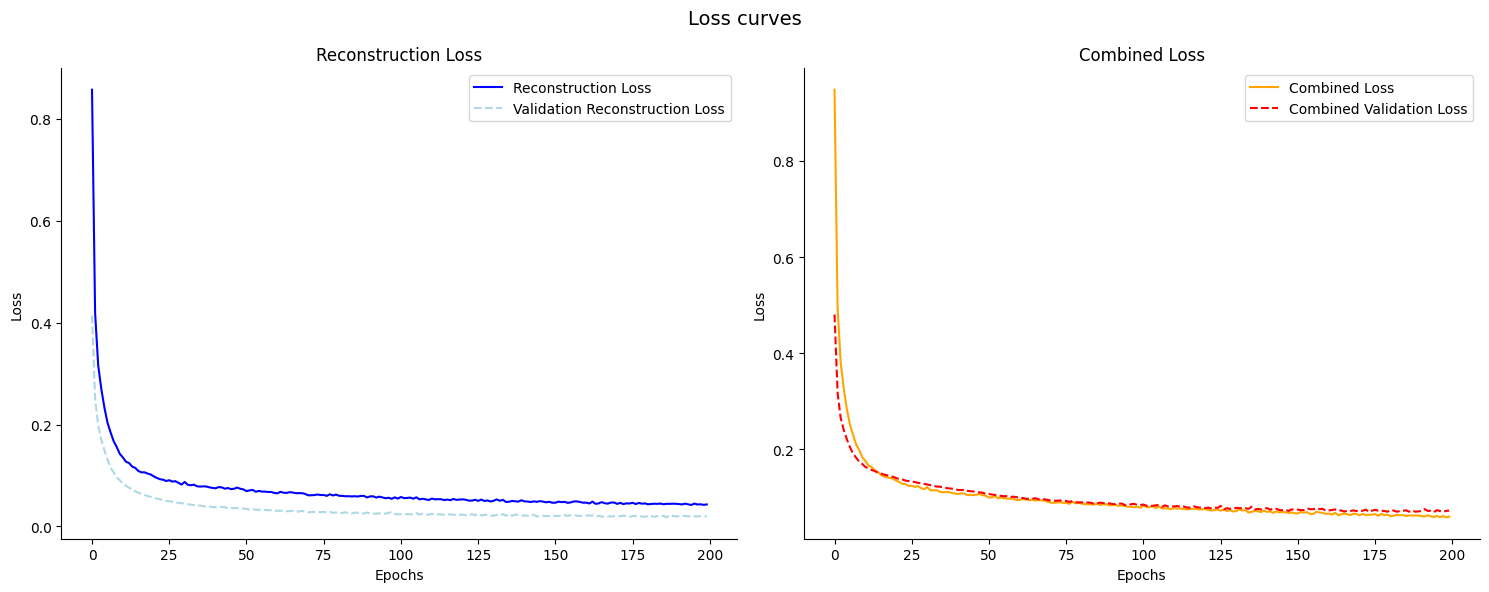

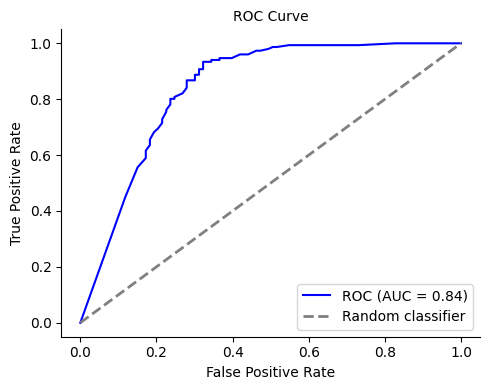

Limb: 4 Subject: 15 Youden Index: 0.575589261553799 Sensitivity: 0.8874172185430463 Specificity: 0.6881720430107527


In [2]:
approach = 1
filename = f'../results/approach1/limb_nested_cv_unaff.csv'

window_size = 100
epochs = 200
batch_size = 32

#For approach1, supervised (class_loss = True), unsupervised (class_loss = False)
class_loss = True
plot_hist = True

X = unaffected[['ax', 'ay', 'az']]
y = unaffected['gnd']
subjects = unaffected['subject']
limbs = unaffected['limb']

hp_grid = {
    'activation': ['relu', 'tanh'],
    'kernel_init': [tf.keras.initializers.HeNormal(seed=42),
                   ],
    'bias_init': [tf.keras.initializers.Zeros()],
    'optimizer': ['nadam'],
    'loss': [tf.keras.losses.mean_squared_error,],
    'learning_rate': [0.0001],
    'batch_norm': [True, False]
} 

results_df, model, encoder, rf_model = run_nested_cv(window_size=window_size,
                           X=X,
                           y=y,
                           subjects=subjects,
                           limbs=limbs,
                           architecture=architecture,
                           hp_grid=hp_grid,
                           epochs=epochs,
                           batch_size=batch_size,
                           class_loss=class_loss,
                           plot_hist=plot_hist,
                           approach=approach)

# summary_results = results_df.groupby(['limb'] + list(hp_grid.keys()))['youden_index'].mean().reset_index()
# summary_results.to_csv(filename, index=False)
# print(np.mean(results_df['youden_index']), np.std(results_df['youden_index']))

In [3]:
print(results_df[['subject', 'youden_index']])
print(f"Mean Youden Index:{np.mean(results_df['youden_index'])}")

   subject  youden_index
0       11      0.531385
1       12      0.692570
2       13      0.318865
3       14      0.452381
4       15      0.575589
Mean Youden Index:0.5141581421970297


In [4]:

s_times = []

for i in subjects.unique():
    subject_n = i
    y_test_w, y_pred_w, subj_ids_w, limb_ids_w, time_taken = time_rf_inference_for_subject(subject_n, 
                                                                                           X, 
                                                                                           y, 
                                                                                           subjects, 
                                                                                           limbs, 
                                                                                           encoder, 
                                                                                           rf_model, 
                                                                                           window_size)
    
    s_times.append(time_taken)

print(f"Average inference time for subjects {subjects.unique()}: {np.mean(s_times)} seconds")


Average inference time for subjects [11 12 13 14 15]: 0.08955965042114258 seconds


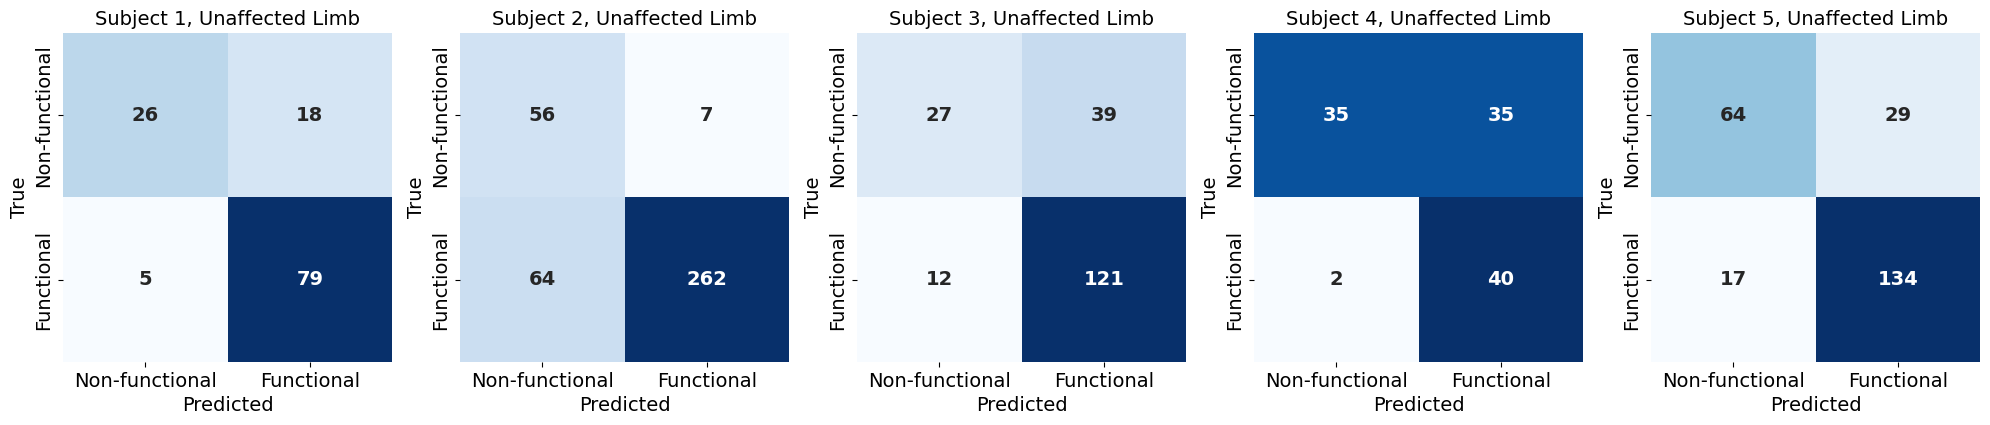

In [5]:
from plot import plot_confusion_matrix
cm = results_df['confusion_matrix']
plot_confusion_matrix(cm, limb = "Unaffected")